In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#preprocessing modules
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

In [3]:
#estimators
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
#cross-validation
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score,train_test_split

In [5]:
train_df = pd.read_csv('train.csv')

In [6]:
test_df = pd.read_csv('test.csv')

In [7]:
train_df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
train_df.describe(include='O')
#gives count & other info about object columns in the data

Name   Sex  Ticket Cabin Embarked
count                   891   891     891   204      889
unique                  891     2     681   147        3
top     Dooley, Mr. Patrick  male  347082    G6        S
freq                      1   577       7     4      644

In [11]:
train_df.groupby(['Pclass'],as_index=False)['Survived'].mean()

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [12]:
train_df.groupby(['Sex'],as_index=False)['Survived'].mean()

Sex  Survived
0  female  0.742038
1    male  0.188908

In [13]:
train_df.groupby(['SibSp'],as_index=False)['Survived'].mean()

SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [14]:
train_df.groupby(['Parch'],as_index=False)['Survived'].mean()

Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000

In [15]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [16]:
train_df.groupby(['Family_Size'],as_index=False)['Survived'].mean()

Family_Size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000

In [17]:
train_df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  Family_Size  
0      0         A/5 21171   7.2500   NaN        S            2  
1      0          PC 17599  71.2833   C85        C            2  
2      0  STON/O2. 3101282   7.9250   NaN        S            1  
3      0            113803  53.1000  C123        S            2  
4      0            373450   8.0500   NaN        S            1  
5      0            330877   8.4583   NaN        Q            1  
6      0             17463  51.8625   E46        S            1  
7      1            349909  21.0750   NaN        S            5  
8      2            347742  11.1333   NaN        S            3  
9      0            237736  30.0708   NaN        C            2

In [18]:
family_map = {1 : 'Alone',2:'Small',3:'Small',4:'Small',5:'Medium',6:'Medium',7:'Large',8:'Large',11:'Large'}

In [19]:
train_df['Family_Size_group'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_group'] = test_df['Family_Size'].map(family_map)

In [20]:
train_df.groupby('Family_Size_group',as_index=False)['Survived'].mean()

Family_Size_group  Survived
0             Alone  0.303538
1             Large  0.160000
2            Medium  0.162162
3             Small  0.578767

In [21]:
train_df.groupby('Embarked',as_index=False)['Survived'].mean()

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

In [22]:
sns.displot(train_df,x = 'Age',col = 'Survived',binwidth = 10,height = 5,kde=True)
#kde True shows the "shape" of data distribution

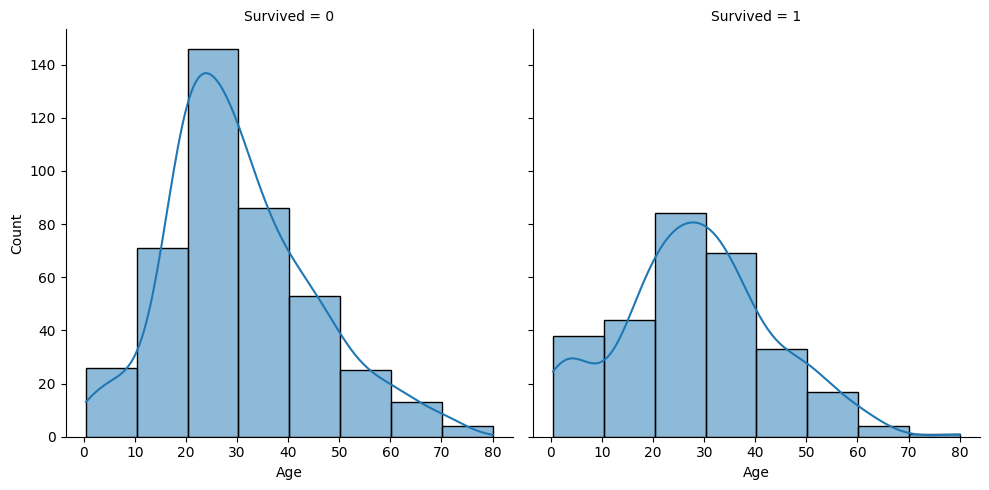

In [23]:
plt.show()

In [24]:
train_df['Age_cut'] = pd.qcut(train_df['Age'],8)
test_df['Age_cut'] = pd.qcut(test_df['Age'],8)

In [25]:
train_df.groupby(['Age_cut'],as_index=False)['Survived'].mean()

/tmp/ipykernel_277019/3684041627.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_cut'],as_index=False)['Survived'].mean()


Age_cut  Survived
0   (0.419, 16.0]  0.550000
1  (16.0, 20.125]  0.341772
2  (20.125, 24.0]  0.367347
3    (24.0, 28.0]  0.352941
4  (28.0, 32.312]  0.416667
5  (32.312, 38.0]  0.450549
6    (38.0, 47.0]  0.329545
7    (47.0, 80.0]  0.415730

In [26]:
#iloc is for integer indexing & loc can be used to index float values like here

train_df.loc[train_df['Age'] <= 16,'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125),'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24),'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28),'Age'] = 3
train_df.loc[(train_df['Age'] > 28)  & (train_df['Age'] <= 32.132),'Age'] = 4
train_df.loc[(train_df['Age'] > 32.132) & (train_df['Age'] <= 38),'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47),'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <= 80),'Age'] = 7
train_df.loc[train_df['Age'] > 80,'Age']

test_df.loc[test_df['Age'] <= 16,'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125),'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24),'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28),'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32.132),'Age'] = 4
test_df.loc[(test_df['Age'] > 32.132) & (test_df['Age'] <= 38),'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47),'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <= 80),'Age'] = 7
test_df.loc[test_df['Age'] > 80,'Age']

Series([], Name: Age, dtype: float64)

In [27]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  2.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
2                             Heikkinen, Miss. Laina  female  3.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
4                           Allen, Mr. William Henry    male  5.0      0   

   Parch            Ticket     Fare Cabin Embarked  Family_Size  \
0      0         A/5 21171   7.2500   NaN        S            2   
1      0          PC 17599  71.2833   C85        C            2   
2      0  STON/O2. 3101282   7.9250   NaN        S            1   
3      0            113803  53.1000  C123        S            2   
4      0            373450   8.0500   NaN        S            1   

  Family_Size_group         Age_cut  
0             Small  (20.125, 24.0]  
1             Small  (32.312, 38.0]  
2             Alone    (24.0, 28.0]  
3             Small  (32.312, 38.0]  
4             Alone  (32.312, 38.0]

In [28]:
sns.displot(train_df,x='Fare',col='Survived',binwidth=80,height=5)


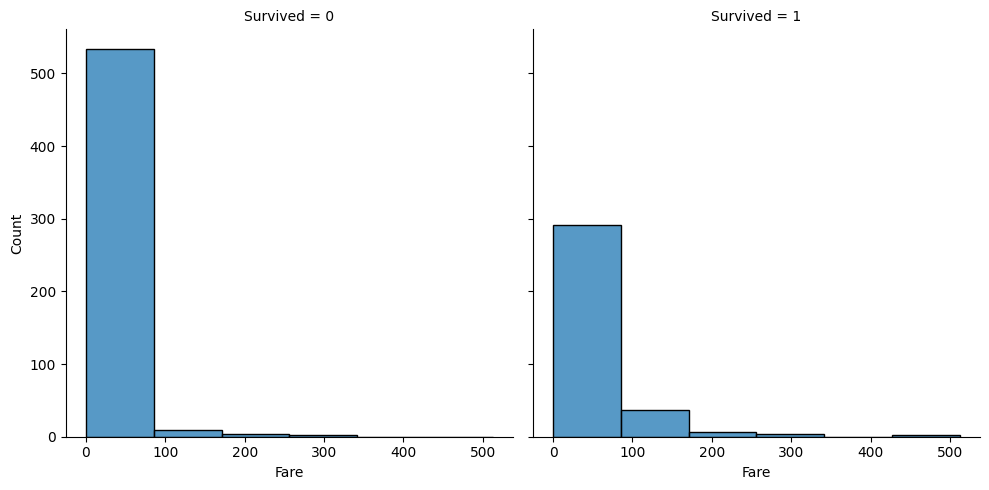

In [29]:
plt.show()

In [30]:
train_df['Fare_cut'] = pd.qcut(train_df['Fare'],6)
test_df['Fare_cut'] = pd.qcut(test_df['Fare'],6)

In [31]:
train_df.groupby(['Fare_cut'],as_index=False)['Survived'].mean()

/tmp/ipykernel_277019/1339538962.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_cut'],as_index=False)['Survived'].mean()


Fare_cut  Survived
0    (-0.001, 7.775]  0.205128
1     (7.775, 8.662]  0.190789
2    (8.662, 14.454]  0.366906
3     (14.454, 26.0]  0.436242
4     (26.0, 52.369]  0.417808
5  (52.369, 512.329]  0.697987

In [32]:
train_df.loc[train_df['Fare'] <= 7.775,'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662),'Fare'] = 1
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454),'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26),'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26.0)  & (train_df['Fare'] <= 52.369),'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329),'Fare'] = 5
train_df.loc[train_df['Fare'] > 512.369,'Fare']

test_df.loc[test_df['Fare'] <= 7.775,'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662),'Fare'] = 1
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454),'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26),'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26.0)  & (test_df['Fare'] <= 52.369),'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329),'Fare'] = 5
test_df.loc[test_df['Fare'] > 512.369,'Fare']

Series([], Name: Fare, dtype: float64)

In [33]:
train_df.groupby(['Fare'],as_index=False)['Survived'].mean()

Fare  Survived
0    0.0000  0.205128
1    1.0000  0.201439
2    2.0000  0.351724
3    3.0000  0.423077
4    4.0000  0.417808
5    5.0000  0.691781
6  512.3292  1.000000

In [34]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  2.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
2                             Heikkinen, Miss. Laina  female  3.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
4                           Allen, Mr. William Henry    male  5.0      0   

   Parch            Ticket  Fare Cabin Embarked  Family_Size  \
0      0         A/5 21171   0.0   NaN        S            2   
1      0          PC 17599   5.0   C85        C            2   
2      0  STON/O2. 3101282   1.0   NaN        S            1   
3      0            113803   5.0  C123        S            2   
4      0            373450   1.0   NaN        S            1   

  Family_Size_group         Age_cut           Fare_cut  
0             Small  (20.125, 24.0]    (-0.001, 7.775]  
1             Small  (32.312, 38.0]  (52.369, 512.329]  
2             Alone    (24.0, 28.0]     (7.775, 8.662]  
3             Small  (32.312, 38.0]  (52.369, 512.329]  
4             Alone  (32.312, 38.0]     (7.775, 8.662]

In [35]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [36]:
train_df['Title'] = train_df['Name'].str.split(pat=',',expand=True)[1].str.split(pat=".",expand=True)[0].apply(lambda x : x.strip())
test_df['Title'] = test_df['Name'].str.split(pat=',',expand=True)[1].str.split(pat=".",expand=True)[0].apply(lambda x : x.strip())

In [37]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  2.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
2                             Heikkinen, Miss. Laina  female  3.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
4                           Allen, Mr. William Henry    male  5.0      0   

   Parch            Ticket  Fare Cabin Embarked  Family_Size  \
0      0         A/5 21171   0.0   NaN        S            2   
1      0          PC 17599   5.0   C85        C            2   
2      0  STON/O2. 3101282   1.0   NaN        S            1   
3      0            113803   5.0  C123        S            2   
4      0            373450   1.0   NaN        S            1   

  Family_Size_group         Age_cut           Fare_cut Title  
0             Small  (20.125, 24.0]    (-0.001, 7.775]    Mr  
1             Small  (32.312, 38.0]  (52.369, 512.329]   Mrs  
2             Alone    (24.0, 28.0]     (7.775, 8.662]  Miss  
3             Small  (32.312, 38.0]  (52.369, 512.329]   Mrs  
4             Alone  (32.312, 38.0]     (7.775, 8.662]    Mr

In [38]:
train_df.groupby('Title',as_index=False)['Survived'].mean()

Title  Survived
0           Capt  0.000000
1            Col  0.500000
2            Don  0.000000
3             Dr  0.428571
4       Jonkheer  0.000000
5           Lady  1.000000
6          Major  0.500000
7         Master  0.575000
8           Miss  0.697802
9           Mlle  1.000000
10           Mme  1.000000
11            Mr  0.156673
12           Mrs  0.792000
13            Ms  1.000000
14           Rev  0.000000
15           Sir  1.000000
16  the Countess  1.000000

In [39]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [40]:
# military -> major,col,capt
# noble -> the Countess, Jonkheer, Lady, Sir, Don
# unmarried women -> Mme, Ms, Mlle

In [41]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [42]:
train_df['Title'] = train_df['Title'].replace(
    {
        'Major' : 'Military',
        'Capt' : 'Military',
        'Col' : 'Military',
        'the Countess' : 'Noble',
        'Don' : 'Noble',
        'Jonkheer' : 'Noble',
        'Lady' : 'Noble',
        'Sir' : 'Noble',
        'Mlle' : 'Noble',
        'Ms' : 'Noble',
        'Mme' : 'Noble'
    }
)

test_df['Title'] = test_df['Title'].replace(
    {
        'Major' : 'Military',
        'Capt' : 'Military',
        'Col' : 'Military',
        'the Countess' : 'Noble',
        'Don' : 'Noble',
        'Jonkheer' : 'Noble',
        'Lady' : 'Noble',
        'Sir' : 'Noble',
        'Mlle' : 'Noble',
        'Ms' : 'Noble',
        'Mme' : 'Noble'
    }
)

In [43]:
train_df.groupby('Title',as_index=False)['Survived'].agg(['count','mean'])

Title  count      mean
0        Dr      7  0.428571
1    Master     40  0.575000
2  Military      5  0.400000
3      Miss    182  0.697802
4        Mr    517  0.156673
5       Mrs    125  0.792000
6     Noble      9  0.777778
7       Rev      6  0.000000

In [44]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x : len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x : len(x))

In [45]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  2.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
2                             Heikkinen, Miss. Laina  female  3.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
4                           Allen, Mr. William Henry    male  5.0      0   

   Parch            Ticket  Fare Cabin Embarked  Family_Size  \
0      0         A/5 21171   0.0   NaN        S            2   
1      0          PC 17599   5.0   C85        C            2   
2      0  STON/O2. 3101282   1.0   NaN        S            1   
3      0            113803   5.0  C123        S            2   
4      0            373450   1.0   NaN        S            1   

  Family_Size_group         Age_cut           Fare_cut Title  Name_Length  
0             Small  (20.125, 24.0]    (-0.001, 7.775]    Mr           23  
1             Small  (32.312, 38.0]  (52.369, 512.329]   Mrs           51  
2             Alone    (24.0, 28.0]     (7.775, 8.662]  Miss           22  
3             Small  (32.312, 38.0]  (52.369, 512.329]   Mrs           44  
4             Alone  (32.312, 38.0]     (7.775, 8.662]    Mr           24

In [46]:
#check the graph with various values of bandwidth, change it by passing bw_adjust parameter

g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==0) & (train_df['Name_Length'].notnull())],color='Red',fill=True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==1) & (train_df['Name_Length'].notnull())],color='Blue',fill=True)
g.set_xlabel('Name Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived','Survived'])

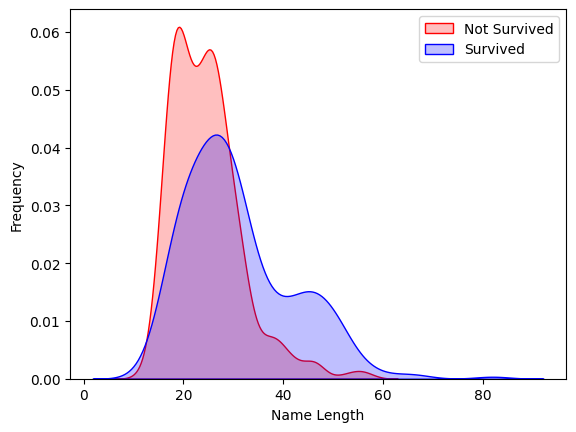

In [47]:
plt.show()

In [48]:
train_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'],8)
test_df['Name_LengthGB'] = pd.qcut(test_df['Name_Length'],8)

In [49]:
train_df.groupby('Name_LengthGB',as_index=False)['Survived'].agg(['mean'])

/tmp/ipykernel_277019/660231237.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('Name_LengthGB',as_index=False)['Survived'].agg(['mean'])


Name_LengthGB      mean
0  (11.999, 18.0]  0.214286
1    (18.0, 20.0]  0.252427
2    (20.0, 23.0]  0.307692
3    (23.0, 25.0]  0.346939
4   (25.0, 27.25]  0.292929
5   (27.25, 30.0]  0.428571
6    (30.0, 38.0]  0.517241
7    (38.0, 82.0]  0.745283

In [50]:
train_df.loc[train_df['Name_Length'] <= 18,'Name_Size'] = 0
train_df.loc[(train_df['Name_Length'] > 18) & (train_df['Name_Length'] <= 20),'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] > 20) & (train_df['Name_Length'] <= 23),'Name_Size'] = 2
train_df.loc[(train_df['Name_Length'] > 23) & (train_df['Name_Length'] <= 25),'Name_Size'] = 3
train_df.loc[(train_df['Name_Length'] > 25)  & (train_df['Name_Length'] <= 27.25),'Name_Size'] = 4
train_df.loc[(train_df['Name_Length'] > 27.25) & (train_df['Name_Length'] <= 30),'Name_Size'] = 5
train_df.loc[(train_df['Name_Length'] > 30) & (train_df['Name_Length'] <= 38),'Name_Size'] = 6
train_df.loc[(train_df['Name_Length'] > 38) & (train_df['Name_Length'] <= 82),'Name_Size'] = 7
train_df.loc[train_df['Name_Length'] > 82,'Name_Size']

test_df.loc[test_df['Name_Length'] <= 18,'Name_Size'] = 0
test_df.loc[(test_df['Name_Length'] > 18) & (test_df['Name_Length'] <= 20),'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] > 20) & (test_df['Name_Length'] <= 23),'Name_Size'] = 2
test_df.loc[(test_df['Name_Length'] > 23) & (test_df['Name_Length'] <= 25),'Name_Size'] = 3
test_df.loc[(test_df['Name_Length'] > 25)  & (test_df['Name_Length'] <= 27.25),'Name_Size'] = 4
test_df.loc[(test_df['Name_Length'] > 27.25) & (test_df['Name_Length'] <= 30),'Name_Size'] = 5
test_df.loc[(test_df['Name_Length'] > 30) & (test_df['Name_Length'] <= 38),'Name_Size'] = 6
test_df.loc[(test_df['Name_Length'] > 38) & (test_df['Name_Length'] <= 82),'Name_Size'] = 7
test_df.loc[test_df['Name_Length'] > 82,'Name_Size']


Series([], Name: Name_Size, dtype: float64)

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        891 non-null    int64   
 1   Survived           891 non-null    int64   
 2   Pclass             891 non-null    int64   
 3   Name               891 non-null    object  
 4   Sex                891 non-null    object  
 5   Age                714 non-null    float64 
 6   SibSp              891 non-null    int64   
 7   Parch              891 non-null    int64   
 8   Ticket             891 non-null    object  
 9   Fare               891 non-null    float64 
 10  Cabin              204 non-null    object  
 11  Embarked           889 non-null    object  
 12  Family_Size        891 non-null    int64   
 13  Family_Size_group  891 non-null    object  
 14  Age_cut            714 non-null    category
 15  Fare_cut           891 non-null    category
 16  Title   

In [52]:
train_df['Ticket_Number'] = train_df['Ticket'].apply(lambda x : pd.Series({'Ticket' : x.split()[-1]}))
test_df['Ticket_Number'] = test_df['Ticket'].apply(lambda x : pd.Series({'Ticket' : x.split()[-1]}))

In [53]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  2.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
2                             Heikkinen, Miss. Laina  female  3.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
4                           Allen, Mr. William Henry    male  5.0      0   

   Parch            Ticket  Fare  ... Embarked Family_Size  Family_Size_group  \
0      0         A/5 21171   0.0  ...        S           2              Small   
1      0          PC 17599   5.0  ...        C           2              Small   
2      0  STON/O2. 3101282   1.0  ...        S           1              Alone   
3      0            113803   5.0  ...        S           2              Small   
4      0            373450   1.0  ...        S           1              Alone   

          Age_cut           Fare_cut Title Name_Length  Name_LengthGB  \
0  (20.125, 24.0]    (-0.001, 7.775]    Mr          23   (20.0, 23.0]   
1  (32.312, 38.0]  (52.369, 512.329]   Mrs          51   (38.0, 82.0]   
2    (24.0, 28.0]     (7.775, 8.662]  Miss          22   (20.0, 23.0]   
3  (32.312, 38.0]  (52.369, 512.329]   Mrs          44   (38.0, 82.0]   
4  (32.312, 38.0]     (7.775, 8.662]    Mr          24   (23.0, 25.0]   

  Name_Size  Ticket_Number  
0       2.0          21171  
1       7.0          17599  
2       2.0        3101282  
3       7.0         113803  
4       3.0         373450  

[5 rows x 21 columns]

In [54]:
train_df.groupby(['Ticket_Number'],as_index=False)['Survived'].agg(['count','mean']).sort_values('count',ascending=False)

Ticket_Number  count      mean
94           1601      7  0.714286
196          2343      7  0.000000
464        347082      7  0.000000
468        347088      6  0.000000
358       3101295      6  0.000000
..            ...    ...       ...
276          2667      1  1.000000
278          2669      1  0.000000
279         26707      1  0.000000
280          2671      1  0.000000
264          2649      1  1.000000

[679 rows x 3 columns]

In [55]:
train_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket_Number, Length: 891, dtype: int64

In [56]:
train_df['TicketNumberCounts'] = train_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')

In [57]:
train_df.groupby(['TicketNumberCounts'],as_index=False)['Survived'].agg(['count','mean']).sort_values('count',ascending=False)

TicketNumberCounts  count      mean
0                   1    544  0.295956
1                   2    188  0.569149
2                   3     66  0.712121
3                   4     44  0.500000
6                   7     21  0.238095
5                   6     18  0.000000
4                   5     10  0.000000

In [58]:
#will look more into TicketNumberCounts in version 2 of this project

In [59]:
train_df['Ticket'].str.split(pat = ' ' ,expand=True)

0        1     2
0         A/5    21171  None
1          PC    17599  None
2    STON/O2.  3101282  None
3      113803     None  None
4      373450     None  None
..        ...      ...   ...
886    211536     None  None
887    112053     None  None
888     W./C.     6607  None
889    111369     None  None
890    370376     None  None

[891 rows x 3 columns]

In [60]:
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat=' ',expand=True)[1].notna(),train_df['Ticket'].str.split(pat=' ',expand=True)[0].apply(lambda x :x.split()[0]),'Blank') 
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat=' ',expand=True)[1].notna(),test_df['Ticket'].str.split(pat=' ',expand=True)[0].apply(lambda x :x.split()[0]),'Blank') 

In [61]:
train_df['TicketLocation']

0           A/5
1            PC
2      STON/O2.
3         Blank
4         Blank
         ...   
886       Blank
887       Blank
888       W./C.
889       Blank
890       Blank
Name: TicketLocation, Length: 891, dtype: object

In [62]:
train_df['TicketLocation'].value_counts()

TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
C               5
S.O.C.          5
SC/PARIS        5
F.C.C.          5
SC/Paris        4
A/4.            3
PP              3
A/4             3
S.O./P.P.       3
SC/AH           3
A./5.           2
P/PP            2
A.5.            2
WE/P            2
SOTON/O2        2
S.C./PARIS      2
S.C./A.4.       1
Fa              1
S.O.P.          1
SO/C            1
S.P.            1
A4.             1
W.E.P.          1
A/S             1
SC              1
SW/PP           1
SCO/W           1
W/C             1
S.W./PP         1
F.C.            1
C.A./SOTON      1
Name: count, dtype: int64

In [63]:
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
        'SOTON/O.Q.' : 'SOTON/OQ',
        'SC/PARIS' : 'SC/Paris',
        'S.C./PARIS' : 'SC/Paris',
        'C.A.' : 'CA',
        'CA.' : 'CA',
        'A/4.' : 'A/4',
        'A.5.' : 'A/5',
        'A/5.' : 'A/5',
        'A./5.' : 'A/5',
        'W./C.' : 'W/C',
})

test_df['TicketLocation'] = test_df['TicketLocation'].replace({
        'SOTON/O.Q.' : 'SOTON/OQ',
        'SC/PARIS' : 'SC/Paris',
        'S.C./PARIS' : 'SC/Paris',
        'C.A.' : 'CA',
        'CA.' : 'CA',
        'A/4.' : 'A/4',
        'A.5.' : 'A/5',
        'A/5.' : 'A/5',
        'A./5.' : 'A/5',
        'W./C.' : 'W/C',
})

In [64]:
train_df['TicketLocation'].value_counts()

TicketLocation
Blank         665
PC             60
CA             41
A/5            21
SOTON/OQ       15
STON/O         12
SC/Paris       11
W/C            10
A/4             6
STON/O2.        6
S.O.C.          5
F.C.C.          5
C               5
SC/AH           3
S.O./P.P.       3
PP              3
WE/P            2
P/PP            2
SOTON/O2        2
A4.             1
SO/C            1
S.C./A.4.       1
W.E.P.          1
S.P.            1
S.O.P.          1
SC              1
SCO/W           1
SW/PP           1
Fa              1
S.W./PP         1
A/S             1
F.C.            1
C.A./SOTON      1
Name: count, dtype: int64

In [65]:
train_df.groupby(['TicketLocation'],as_index=False)['Survived'].agg(['count','mean'])

TicketLocation  count      mean
0             A/4      6  0.000000
1             A/5     21  0.095238
2             A/S      1  0.000000
3             A4.      1  0.000000
4           Blank    665  0.383459
5               C      5  0.400000
6      C.A./SOTON      1  0.000000
7              CA     41  0.341463
8            F.C.      1  0.000000
9          F.C.C.      5  0.800000
10             Fa      1  0.000000
11           P/PP      2  0.500000
12             PC     60  0.650000
13             PP      3  0.666667
14      S.C./A.4.      1  0.000000
15      S.O./P.P.      3  0.000000
16         S.O.C.      5  0.000000
17         S.O.P.      1  0.000000
18           S.P.      1  0.000000
19        S.W./PP      1  1.000000
20             SC      1  1.000000
21          SC/AH      3  0.666667
22       SC/Paris     11  0.454545
23          SCO/W      1  0.000000
24           SO/C      1  1.000000
25       SOTON/O2      2  0.000000
26       SOTON/OQ     15  0.133333
27         STON/O     12  0.416667
28       STON/O2.      6  0.500000
29          SW/PP      1  1.000000
30         W.E.P.      1  0.000000
31            W/C     10  0.100000
32           WE/P      2  0.500000

In [66]:
#this code only keeps the first letter of the Cabin number

train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series(i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin'])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series(i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin'])

In [67]:
train_df['Cabin']

0      U
1      C
2      U
3      C
4      U
      ..
886    U
887    B
888    U
889    C
890    U
Name: Cabin, Length: 891, dtype: object

In [68]:
train_df.groupby('Cabin',as_index=False)['Survived'].agg(['count','mean'])

Cabin  count      mean
0     A     15  0.466667
1     B     47  0.744681
2     C     59  0.593220
3     D     33  0.757576
4     E     32  0.750000
5     F     13  0.615385
6     G      4  0.500000
7     T      1  0.000000
8     U    687  0.299854

In [69]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x : 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x : 0 if x in ['U'] else 1)

In [70]:
#in pd.head(), some columns are hidden so to see all the columns, we can use this function
pd.set_option('display.max_columns',25)
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  2.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
2                             Heikkinen, Miss. Laina  female  3.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
4                           Allen, Mr. William Henry    male  5.0      0   

   Parch            Ticket  Fare Cabin Embarked  Family_Size  \
0      0         A/5 21171   0.0     U        S            2   
1      0          PC 17599   5.0     C        C            2   
2      0  STON/O2. 3101282   1.0     U        S            1   
3      0            113803   5.0     C        S            2   
4      0            373450   1.0     U        S            1   

  Family_Size_group         Age_cut           Fare_cut Title  Name_Length  \
0             Small  (20.125, 24.0]    (-0.001, 7.775]    Mr           23   
1             Small  (32.312, 38.0]  (52.369, 512.329]   Mrs           51   
2             Alone    (24.0, 28.0]     (7.775, 8.662]  Miss           22   
3             Small  (32.312, 38.0]  (52.369, 512.329]   Mrs           44   
4             Alone  (32.312, 38.0]     (7.775, 8.662]    Mr           24   

  Name_LengthGB  Name_Size Ticket_Number  TicketNumberCounts TicketLocation  \
0  (20.0, 23.0]        2.0         21171                   1            A/5   
1  (38.0, 82.0]        7.0         17599                   1             PC   
2  (20.0, 23.0]        2.0       3101282                   1       STON/O2.   
3  (38.0, 82.0]        7.0        113803                   2          Blank   
4  (23.0, 25.0]        3.0        373450                   1          Blank   

   Cabin_Assigned  
0               0  
1               1  
2               0  
3               1  
4               0

In [71]:
train_df.groupby('Cabin_Assigned',as_index=False)['Survived'].agg(['count','mean'])

Cabin_Assigned  count      mean
0               0    687  0.299854
1               1    204  0.666667

In [72]:
train_df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  2.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
2                             Heikkinen, Miss. Laina  female  3.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
4                           Allen, Mr. William Henry    male  5.0      0   

   Parch            Ticket  Fare Cabin Embarked  Family_Size  \
0      0         A/5 21171   0.0     U        S            2   
1      0          PC 17599   5.0     C        C            2   
2      0  STON/O2. 3101282   1.0     U        S            1   
3      0            113803   5.0     C        S            2   
4      0            373450   1.0     U        S            1   

  Family_Size_group         Age_cut           Fare_cut Title  Name_Length  \
0             Small  (20.125, 24.0]    (-0.001, 7.775]    Mr           23   
1             Small  (32.312, 38.0]  (52.369, 512.329]   Mrs           51   
2             Alone    (24.0, 28.0]     (7.775, 8.662]  Miss           22   
3             Small  (32.312, 38.0]  (52.369, 512.329]   Mrs           44   
4             Alone  (32.312, 38.0]     (7.775, 8.662]    Mr           24   

  Name_LengthGB  Name_Size Ticket_Number  TicketNumberCounts TicketLocation  \
0  (20.0, 23.0]        2.0         21171                   1            A/5   
1  (38.0, 82.0]        7.0         17599                   1             PC   
2  (20.0, 23.0]        2.0       3101282                   1       STON/O2.   
3  (38.0, 82.0]        7.0        113803                   2          Blank   
4  (23.0, 25.0]        3.0        373450                   1          Blank   

   Cabin_Assigned  
0               0  
1               1  
2               0  
3               1  
4               0

In [73]:
train_df.shape

(891, 24)

In [74]:
test_df.shape

(418, 23)

In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 714 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            889 non-null    object  
 12  Family_Size         891 non-null    int64   
 13  Family_Size_group   891 non-null    object  
 14  Age_cut             714 non-null    category
 15  Fare_cut            891 non-null    cate

In [76]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_group', 'Age_cut', 'Fare_cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'Ticket_Number', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [77]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         418 non-null    int64   
 1   Pclass              418 non-null    int64   
 2   Name                418 non-null    object  
 3   Sex                 418 non-null    object  
 4   Age                 332 non-null    float64 
 5   SibSp               418 non-null    int64   
 6   Parch               418 non-null    int64   
 7   Ticket              418 non-null    object  
 8   Fare                417 non-null    float64 
 9   Cabin               418 non-null    object  
 10  Embarked            418 non-null    object  
 11  Family_Size         418 non-null    int64   
 12  Family_Size_group   418 non-null    object  
 13  Age_cut             332 non-null    category
 14  Fare_cut            417 non-null    category
 15  Title               418 non-null    obje

In [78]:
#see the survivalability where Age is not provided

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [79]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder()
SI = SimpleImputer(strategy='most_frequent')

In [80]:
ode_cols = ['Family_Size_group']
ohe_cols = ['Sex','Embarked']


In [81]:
X = train_df.drop(['Survived'],axis=1)
y = train_df['Survived']

In [82]:
X_test = test_df.drop(['Age_cut','Fare_cut'],axis=1)

In [141]:
X_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex       Age  SibSp  Parch              Ticket  Fare Cabin Embarked  \
0      male  5.000000      0      0              330911   1.0     U        Q   
1    female  6.000000      1      0              363272   0.0     U        S   
2      male  7.000000      0      0              240276   2.0     U        Q   
3      male  3.000000      0      0              315154   2.0     U        S   
4    female  2.000000      1      1             3101298   2.0     U        S   
..      ...       ...    ...    ...                 ...   ...   ...      ...   
413    male  3.533133      0      0           A.5. 3236   1.0     U        S   
414  female  6.000000      0      0            PC 17758   5.0     C        C   
415    male  6.000000      0      0  SOTON/O.Q. 3101262   0.0     U        S   
416    male  3.533133      0      0              359309   1.0     U        S   
417    male  3.533133      1      1                2668   3.0     U        C   

     Family_Size Family_Size_group   Title  Name_Length   Name_LengthGB  \
0              1             Alone      Mr           16  (12.999, 18.0]   
1              2             Small     Mrs           32   (30.75, 41.0]   
2              1             Alone      Mr           25    (23.0, 25.0]   
3              1             Alone      Mr           16  (12.999, 18.0]   
4              3             Small     Mrs           44    (41.0, 63.0]   
..           ...               ...     ...          ...             ...   
413            1             Alone      Mr           18  (12.999, 18.0]   
414            1             Alone    Dona           28   (27.0, 30.75]   
415            1             Alone      Mr           28   (27.0, 30.75]   
416            1             Alone      Mr           19    (18.0, 20.0]   
417            3             Small  Master           24    (23.0, 25.0]   

     Name_Size Ticket_Number  TicketNumberCounts TicketLocation  \
0          0.0        330911                   1          Blank   
1          6.0        363272                   1          Blank   
2          3.0        240276                   1          Blank   
3          0.0        315154                   1          Blank   
4          7.0       3101298                   1          Blank   
..         ...           ...                 ...            ...   
413        0.0          3236                   1            A/5   
414        5.0         17758                   1             PC   
415        5.0       3101262                   1       SOTON/OQ   
416        1.0        359309                   1          Blank   
417        3.0          2668                   1          Blank   

     Cabin_Assigned  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
..              ...  
413               0  
414               1  
415               0  
416               0  
417               0  

[418 rows x 21 columns]

In [83]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=21,test_size=0.2,stratify=y)

In [84]:
ordinal_pipeline = Pipeline(steps=[
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('ord',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

ohe_pipeline = Pipeline(steps=[
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('one-hot',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

In [85]:
col_trans = ColumnTransformer(transformers = [
        ('impute',SI,['Age']),
        ('ord_pipeline',ordinal_pipeline,ode_cols),
        ('ohe_pipeline',ohe_pipeline,ohe_cols),
        ('passthrough','passthrough',['Pclass','TicketNumberCounts','Cabin_Assigned','Name_Size','Age','Fare'])
],
        remainder='drop',
        n_jobs=-1
                             )

In [86]:
rfc = RandomForestClassifier()

In [87]:
param_grid = {
    'n_estimators' : [100,200,300],
    'min_samples_split' : [5,10,15],
    'max_depth' : [8,9,10,15,20],
    'min_samples_leaf' : [1,2,4],
    'criterion' : ['gini','entropy'],
}

In [88]:
CV_rfc = GridSearchCV(rfc,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [89]:
pipefinalrfc = make_pipeline(col_trans,CV_rfc)

In [90]:
pipefinalrfc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_group']),
                                                 ('ohe_pipeline',
                                                  Pipeline(ste...
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 200, 300]}))])

In [91]:
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [92]:
print(CV_rfc.best_score_)

0.8286713286713286


In [93]:
dtc = DecisionTreeClassifier()

In [94]:
param_grid = {
    'min_samples_split' : [5,10,15],
    'max_depth' : [10,20,30],
    'min_samples_leaf' : [1,2,4],
    'criterion' : ['gini','entropy'],
}

In [95]:
CV_dtc = GridSearchCV(dtc,param_grid = param_grid, cv = StratifiedKFold(n_splits=5))

In [96]:
pipefinaldtc = make_pipeline(col_trans,CV_dtc)

In [97]:
pipefinaldtc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_group']),
                                                 ('ohe_pipeline',
                                                  Pipeline(ste...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [98]:
print(CV_dtc.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15}


In [99]:
print(CV_dtc.best_score_)

0.8159854230276766


In [100]:
knn = KNeighborsClassifier()

In [101]:
param_grid = {
    'n_neighbors' : [3,5,7,9,11],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto','ball_tree','kd_tree','brute'],
    'p' : [1,2]
}

In [102]:
CV_knn = GridSearchCV(knn,param_grid = param_grid, cv = StratifiedKFold(n_splits=5))

In [103]:
pipefinalknn = make_pipeline(col_trans,CV_knn)

In [104]:
pipefinalknn.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_group']),
                                                 ('ohe_pipeline',
                                                  Pipeline(ste...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [105]:
print(CV_knn.best_params_)

{'algorithm': 'brute', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [106]:
print(CV_knn.best_score_)

0.8076529104698119


In [107]:
svc = SVC()

In [108]:
param_grid = {
    'C' : [100,10,1.0,0.1,0.01,0.001],
    'kernel' : ['linear','poly','rbf','sigmoid'],
}

#I can add gamma value also here

In [109]:
CV_svc = GridSearchCV(svc,param_grid = param_grid, cv = StratifiedKFold(n_splits=5))

In [110]:
pipefinalsvc = make_pipeline(col_trans,CV_svc)

In [111]:
pipefinalsvc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_group']),
                                                 ('ohe_pipeline',
                                                  Pipeline(ste...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [112]:
print(CV_svc.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [113]:
print(CV_svc.best_score_)

0.7991529597163399


In [114]:
lr = LogisticRegression(max_iter=1000)

In [115]:
param_grid = {
    'C' : [100,10,1.0,0.1,0.01,0.001],
}

#max_iter and solver can be added here too

In [116]:
CV_lr = GridSearchCV(lr,param_grid = param_grid, cv = StratifiedKFold(n_splits=5))

In [117]:
pipefinallr = make_pipeline(col_trans,CV_lr)

In [118]:
pipefinallr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_group']),
                                                 ('ohe_pipeline',
                                                  Pipeline(ste...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(max_iter=1000),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.01,
                                                0.001]}))])

In [119]:
print(CV_lr.best_params_)

{'C': 0.1}


In [120]:
print(CV_lr.best_score_)

0.8048163104501134


In [121]:
gnb = GaussianNB()

In [122]:
param_grid = {
    'var_smoothing' : [0.00000001,0.000000001,0.00000001]
}

In [123]:
CV_gnb = GridSearchCV(gnb,param_grid=param_grid,cv= StratifiedKFold(n_splits=5))

In [124]:
pipefinalgnb = make_pipeline(col_trans,CV_gnb)

In [125]:
pipefinalgnb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_group']),
                                                 ('ohe_pipeline',
                                                  Pipeline(ste...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-08]}))])

In [126]:
print(CV_gnb.best_params_)

{'var_smoothing': 1e-09}


In [127]:
print(CV_gnb.best_score_)

0.7795035949965528


In [128]:
y_pred = pipefinalrfc.predict(X_test)
y_pred2 = pipefinaldtc.predict(X_test)
y_pred3 = pipefinalknn.predict(X_test)
y_pred4 = pipefinalsvc.predict(X_test)
y_pred5 = pipefinallr.predict(X_test)
y_pred6 = pipefinalgnb.predict(X_test)

In [130]:
submission = pd.DataFrame({
    'PassengerID' : test_df['PassengerId'],
    'Survived' : y_pred
})

submission2 = pd.DataFrame({
    'PassengerID' : test_df['PassengerId'],
    'Survived' : y_pred2
})

submission3 = pd.DataFrame({
    'PassengerID' : test_df['PassengerId'],
    'Survived' : y_pred3
})

submission4 = pd.DataFrame({
    'PassengerID' : test_df['PassengerId'],
    'Survived' : y_pred4
})

submission5 = pd.DataFrame({
    'PassengerID' : test_df['PassengerId'],
    'Survived' : y_pred5
})

submission6 = pd.DataFrame({
    'PassengerID' : test_df['PassengerId'],
    'Survived' : y_pred6
})

In [131]:
submission.to_csv('Submission.csv',index=False)
submission2.to_csv('Submission2.csv',index=False)
submission3.to_csv('Submission3.csv',index=False)
submission4.to_csv('Submission4.csv',index=False)
submission5.to_csv('Submission5.csv',index=False)
submission6.to_csv('Submission6.csv',index=False)

In [132]:
#for comparing results of different algorithms

In [136]:
from tabulate import tabulate

In [138]:
my_data = [
    [1,'Random Forest', CV_rfc.best_score_],
    [2,'Decision Tree', CV_dtc.best_score_],
    [3,'KNN', CV_knn.best_score_],
    [4,'Support Vector Machine', CV_svc.best_score_],
    [5,'Logistic Regression', CV_lr.best_score_],
    [6,'Gaussian Naive Bayes', CV_gnb.best_score_],

]

columns = ['Algorithm' , 'Accuracy']

print(tabulate(my_data,headers=columns,tablefmt = 'grid'))

+----+------------------------+------------+
|    | Algorithm              |   Accuracy |
+====+========================+============+
|  1 | Random Forest          |   0.828671 |
+----+------------------------+------------+
|  2 | Decision Tree          |   0.815985 |
+----+------------------------+------------+
|  3 | KNN                    |   0.807653 |
+----+------------------------+------------+
|  4 | Support Vector Machine |   0.799153 |
+----+------------------------+------------+
|  5 | Logistic Regression    |   0.804816 |
+----+------------------------+------------+
|  6 | Gaussian Naive Bayes   |   0.779504 |
+----+------------------------+------------+


In [140]:
#note - best accuracy is with Gaussian Naive Bayes ~ 0.77272